<a href="https://colab.research.google.com/github/ajay-1010/WIDS_Stock_Price_Prediction_With_LSTM_Networks-/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance pandas numpy matplotlib seaborn tensorflow scikit-learn


## 2. Load Data



In [2]:
import yfinance as yf
import pandas as pd

# Define stock symbol and time frame
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-12-31'

# Download data
data = yf.download(symbol, start=start_date, end=end_date)
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.447413  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.458558  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.355827  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.344076  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.386255  7.570714  7.571429  7.466429  7.510714  447610800


## 3. Exploratory Data Analysis (EDA)

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


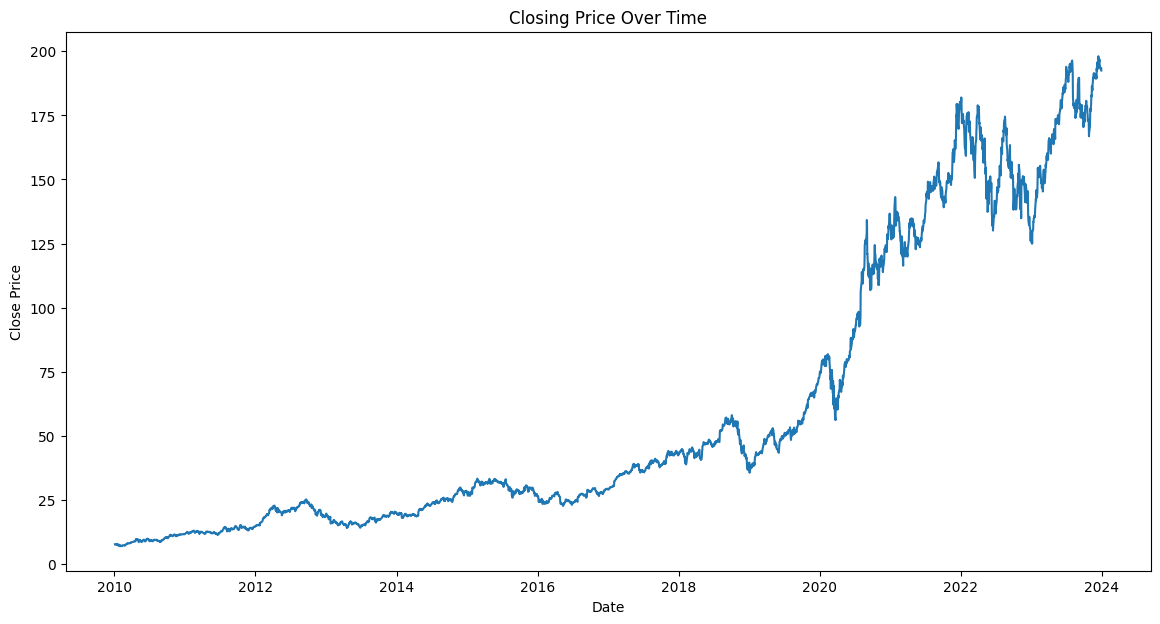

In [3]:
import matplotlib.pyplot as plt

# Check for missing values
print(data.isnull().sum())

# Plot closing prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


## 4. Data Preprocessing
### Focus on the 'Close' price.
### Normalize using Min-Max Scaling.
### Create sequences (e.g., the last 60 days' prices).
### Split the data into training (80%) and test (20%) sets.

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

sequence_length = 60
sequences = create_sequences(scaled_data, sequence_length)
train_size = int(len(sequences) * 0.8)

train_data = sequences[:train_size]
test_data = sequences[train_size:]

x_train, y_train = train_data[:, :-1], train_data[:, -1]
x_test, y_test = test_data[:, :-1], test_data[:, -1]


## 5. Build the LSTM Model

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0077 - val_loss: 0.0017
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 5.4432e-04 - val_loss: 0.0013
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 5.5830e-04 - val_loss: 9.8462e-04
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 4.8266e-04 - val_loss: 0.0011
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 4.4128e-04 - val_loss: 9.4868e-04
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 4.1710e-04 - val_loss: 0.0020
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 3.9169e-04 - val_loss: 0.0012
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 3.6332e-04 - val_loss: 0.0015
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 4.2111e-04 - val_loss: 0.0015
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 3.2796e-04 - val_loss: 0.0012
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 4.1915e-04 - val_loss: 8.5348e-04
Epoch 12/20
87/87 

## 6. Evaluate the Model

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step


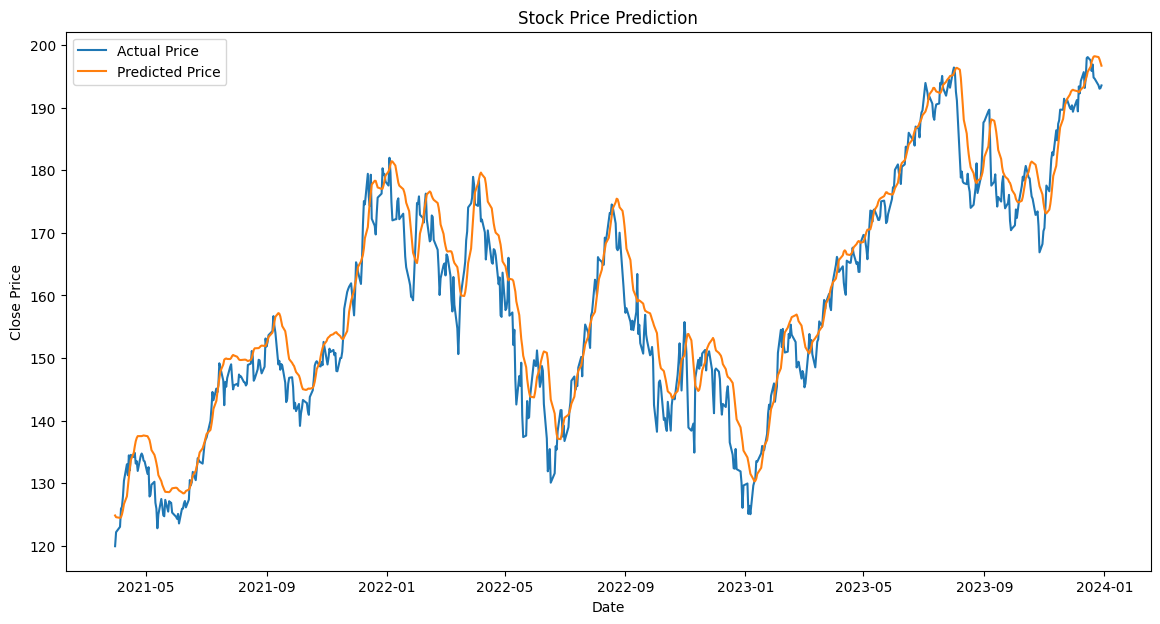

In [6]:
# Predictions and inverse scaling
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(predictions):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Price')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## 7. Model Performance Metrics
### Calculate MAE, MSE, and RMSE.

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)
rmse = np.sqrt(mse)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')


MAE: 4.049379191873394, MSE: 27.264523060784306, RMSE: 5.221544126097596
